# Pandas Basics — Part 1

In this lesson, we're going to introduce some of the basics of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html) (**Pan**el**Da**ta), a powerful Python library for working with tabular data like CSV files.

We will cover how to:

* Import Pandas
* Read in a CSV file
* Explore and filter data
* Make simple plots and data visualizations
* Write a CSV file
___

## 1. About Pandas Data Structures

<figure style="float:left;margin-right:1rem;width:300px">
<img style="border:solid black 1px;border-radius:7px;" src="../images/3.1-pandas-data-structure.png">
<figcaption style="font-size:8px">Original image src: <a href="https://github.com/dataprofessor/streamlit-for-datascience/tree/master/img">Nantasenamat</a></figcaption>
</figure>
Pandas makes it so much easier to work with indexed tabular data. The main types of data structures that pandas work with are *Series* and *DataFrames*.

**Pandas Series**: One-dimensional array akin to a `column` *OR* a `row` in a spreadsheet. They are essentially a special kind of array list with special methods and functions. 

**Pandas DataFrame**: Two-dimensional array akin to the combination of `columns` *AND* `rows` in a spreadsheet. Like Series, the DataFrame has special methods and functions that we can use to explore and analyze data. Also, we will focus a lot more on DFs, rather than Series. But, you should know about Series, because you sometimes create new Series (columns or rows) to add to your existing DataFrame. It's pretty rad.

**Indices**: Notice the color-coding going in the figure: red, blue, and yellow. The red and blue represent the indices of the rows and columns, while the yellow squares represent the values in the dataset.

In [1]:
# Standard way of importing the pandas lib
import pandas as pd

# An example DF from scratch :-)
pd.DataFrame(
    [['Dairy Queen', 45, 53], ['Cold Stone', 40, 436], ['Dip\'n\'Dots', 15, 12]],
    columns=['ice_cream_company', 'votes', 'flavor_count']
)

# Notice the 0,1,2 column of values with no name? That's the autogenerated index. 
# Who says coding wasn't just a form of programmatic writing!

,ice_cream_company,votes,flavor_count
0,Dairy Queen,45,53
1,Cold Stone,40,436
2,Dip'n'Dots,15,12


Now that we have a taste of what type of data pandas works with, let's walk through an applied case.

## 2. About the Dataset


### 2.1 The Bellevue Almshouse Dataset

<blockquote class="epigraph" style=" padding: 10px">

Nineteenth-century immigration data was produced with the express purpose of reducing people to bodies; bodies to easily quantifiable aspects; and assigning value to those aspects which proved that the marginalized people to who they belonged were worth less than their elite counterparts.

-Anelise Shrout, ["(Re)Humanizing Data"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)
</blockquote>

The dataset that we're working with in this lesson is the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/), created by historian and DH scholar Anelise Shrout. It includes information about Irish-born immigrants who were admitted to New York City's Bellevue Almshouse in the 1840s.

The Bellevue Almshouse was part of New York City's public health system, a place where poor, sick, homeless, and otherwise marginalized people were sent — sometimes voluntarily and sometimes forcibly. Devastated by widespread famine in Ireland, many Irish people fled their homes for New York City in the 1840s, and many of them ended up in the Bellevue Almshouse.

We're using the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/) to practice data analysis with Pandas because we want to think deeply about the consequences of reducing human life to data. As Shrout argues in [her essay](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/), this data purposely reduced people to bodies and "easily quantifiable aspects" in order to devalue their lives, potentially enacting "both epistemic and physical violence" on them.

We want to think about how responsible data analysis requires more than just technical tools like Pandas. It also requires an interrogation of the data. Who collected this data? How and why was this data collected? What assumptions are present in this data? What are the consequences of this data in the world? What does this data reflect about the world? For example, Shrout claims that the "Bellevue administrators framed any ailments or difficulties inmates might have had as a consequence of [their immigration] status" — perhaps best exemplified by the fact that a frequent "disease" in the dataset is "recent emigrant." Below we're going to explore the prevalence of "recent emigrant" in the data as well as other salient patterns.

## 3. Import Pandas

<div style="background:lightblue; padding:10px">
<p><strong>Note</strong>: If you installed Python with Anaconda, you should already have Pandas installed. If you did not install Python with Anaconda, run the cell below.</p>
</div>

In [ ]:
!pip install pandas

To use the Pandas library, we first need to `import` it, which we already did above like so: `import pandas as pd`.

The  `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

In [2]:
import pandas as pd

## 4. Set Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [3]:
pd.options.display.max_rows = 100

## 5. Read in CSV File

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [4]:
bellevue_df = pd.read_csv('../data/03-pandas/bellevue_almshouse_modified.csv', delimiter=",")

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — often abbreviated as *df*, e.g., *bellevue_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

When reading in the CSV file, we also specified the `encoding` and `delimiter`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`\t`) or, more rarely, another character.

## 6. Displaying Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

<div style="background:lightblue; color:white; padding:10px">
<p><strong>Pandas Review</strong>: <code style="color:black">NaN</code> is the Pandas value for any missing data. See <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan/" style="color:black">"Working with missing data"</a> for more information.
</div>

In [5]:
bellevue_df

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo
2,1847-04-17,Anthony,Clark,60.0,recent emigrant,laborer,m,Charles Riley afed 10 days
3,1847-04-08,Lawrence,Feeney,32.0,recent emigrant,laborer,m,Child
4,1847-04-13,Henry,Joyce,21.0,recent emigrant,NaN,m,Child 1 mo
...,...,...,...,...,...,...,...,...
9579,1847-06-17,Mary,Smith,47.0,NaN,NaN,w,NaN
9580,1847-06-22,Francis,Riley,29.0,lame,superintendent,m,NaN
9581,1847-07-02,Martin,Dunn,4.0,NaN,NaN,m,NaN
9582,1847-07-08,Elizabeth,Post,32.0,NaN,NaN,w,NaN


There are a few important things to note about the DataFrame displayed here:

* Index
    * The bolded ascending numbers in the very left-hand column of the DataFrame is called the Pandas *Index*. You can select rows based on the Index.
    * By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

* Truncation
    * The DataFrame is truncated, signaled by the ellipses in the middle `...` of every column.
    * The DataFrame is truncated because we set our default display settings to 100 rows. Anything more than 100 rows will be truncated. To display all the rows, we would need to alter Pandas' default display settings yet again.

* Rows x Columns
    * Pandas reports how many rows and columns are in this dataset at the bottom of the output (9584 x 8 columns).
    * This is very useful!

### 6.1 Displaying first and last *n* rows

To look at the first *n* rows in a DataFrame, we can use a method called `.head()`.

In [6]:
bellevue_df.head(2)

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo


In [7]:
bellevue_df.head(10)

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo
2,1847-04-17,Anthony,Clark,60.0,recent emigrant,laborer,m,Charles Riley afed 10 days
3,1847-04-08,Lawrence,Feeney,32.0,recent emigrant,laborer,m,Child
4,1847-04-13,Henry,Joyce,21.0,recent emigrant,NaN,m,Child 1 mo
5,1847-04-14,Bridget,Hart,20.0,recent emigrant,spinster,w,Child
6,1847-04-14,Mary,Green,40.0,recent emigrant,spinster,w,And child 2 months
7,1847-04-19,Daniel,Loftus,27.0,destitution,laborer,m,NaN
8,1847-04-10,James,Day,35.0,recent emigrant,laborer,m,NaN
9,1847-04-10,Margaret,Farrell,30.0,recent emigrant,widow,w,NaN


To look at the LAST *n* rows in a DataFrame, we can use a method called `.tail()`.

In [8]:
bellevue_df.tail(10)

,date_in,first_name,last_name,age,disease,profession,gender,children
9574,1846-08-14,Ann,Murray,25.0,NaN,NaN,w,NaN
9575,1847-08-18,William,Donovan,40.0,sickness,laborer,m,NaN
9576,1847-08-18,James,Lynch,33.0,sore,laborer,m,NaN
9577,1847-04-30,Jas,Bowden,40.0,sickness,mason,m,NaN
9578,1846-05-23,Joseph,Aton,69.0,NaN,shoemaker,m,NaN
9579,1847-06-17,Mary,Smith,47.0,NaN,NaN,w,NaN
9580,1847-06-22,Francis,Riley,29.0,lame,superintendent,m,NaN
9581,1847-07-02,Martin,Dunn,4.0,NaN,NaN,m,NaN
9582,1847-07-08,Elizabeth,Post,32.0,NaN,NaN,w,NaN
9583,1847-04-28,Bridget,Ryan,28.0,destitution,spinster,w,NaN


### 6.2 Displaying Random Sample

To look at a random sample of rows, we can use the `.sample()` method.

In [9]:
bellevue_df.sample(10)

,date_in,first_name,last_name,age,disease,profession,gender,children
4936,1846-12-07,Elizabeth,encoding error,21.0,NaN,widow,w,NaN
717,1847-05-26,William,Deasy,30.0,recent emigrant,laborer,m,NaN
3179,1846-02-20,Michael,Nichols,32.0,NaN,laborer,m,NaN
399,1847-05-21,Bridget,Coyne,17.0,sickness,spinster,w,NaN
4134,1846-08-18,Nora,Cleary,35.0,NaN,married,w,NaN
4636,1846-10-19,Sarah,Donlin,28.0,NaN,spinster,w,NaN
144,1847-04-30,Betsy,McGreen,20.0,sickness,spinster,w,NaN
1695,1847-03-06,John,Kenny,19.0,recent emigrant,laborer,m,NaN
6763,1847-09-15,Pat,Hennessy,40.0,sickness,laborer,m,NaN
7527,1847-11-27,Edward,Eafer,37.0,sickness,laborer,m,NaN


### 6.3 Displaying summary information

To get important info about all the columns in the DataFrame, we can use `.info()`.

In [10]:
bellevue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9584 entries, 0 to 9583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_in     9584 non-null   object 
 1   first_name  9580 non-null   object 
 2   last_name   9584 non-null   object 
 3   age         9534 non-null   float64
 4   disease     6497 non-null   object 
 5   profession  8565 non-null   object 
 6   gender      9584 non-null   object 
 7   children    37 non-null     object 
dtypes: float64(1), object(7)
memory usage: 599.1+ KB


This report will tell us how many non-null, or non-blank, values are in each column, as well as what *type* of data is in each column.



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

### 6.4 Calculate and show summary statistics

To calculate summary statistics for every column in our DataFrame, we can use the `.describe()` method.

In [11]:
bellevue_df.describe()

,age
count,9534.000000
mean,30.332604
std,14.179608
min,0.080000
25%,21.000000
50%,28.000000
75%,39.000000
max,97.000000


By default, `.describe()` will only compute columns with numerical data. To include all columns, we can use `include='all`.

<div class="admonition pandasreview" name="html-admonition" style="background: black; color: white; padding: 10px">
<p class="title">Pandas Review</p>
<code>NaN</code> is the Pandas value for any missing data. See <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan/">"Working with missing data"</a> for more information.
     
</div>

In [12]:
bellevue_df.describe(include='all')

,date_in,first_name,last_name,age,disease,profession,gender,children
count,9584,9580,9584,9534.000000,6497,8565,9584,37
unique,653,523,3142,NaN,75,172,5,36
top,1847-05-24,Mary,Kelly,NaN,sickness,laborer,m,Child
freq,113,979,137,NaN,2706,3108,4958,2
mean,NaN,NaN,NaN,30.332604,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,14.179608,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.080000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN


Here are some insights that can be gleaned from these summary statistics:
- For the column **date_in**, the earliest recorded admission to the Bellevue Almshouse (**first**) is 1846-01-01  and the latest (**last**) is 1847-12-31 
- For the column **first_name**, the most frequently occurring first name (**top**) is Mary, which appears 979 times (**freq**)
- For the column **last_name**, the most frequently occurring last name (**top**) is Kelly, which appears 137 times (**freq**)
- For the column **age**, average age in the dataset (**mean**) is 30, the youngest (**min**) is .8, and the oldest (**max**) is 97
- For the columns **disease** and **profession**, there are 75 unique (**unique**) diseases and 172 unique (**unique**) professions
- For the column **children**, there are 37 rows that include information about children (**count**) (i.e., rows that do not have blank values)



## 7. Selecting Columns

### 7.1 Select single column 

To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [13]:
bellevue_df['disease']

0       recent emigrant
1       recent emigrant
2       recent emigrant
3       recent emigrant
4       recent emigrant
             ...       
9579                NaN
9580               lame
9581                NaN
9582                NaN
9583        destitution
Name: disease, Length: 9584, dtype: object

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title">Python Review</p>

**Dictionary**
    
<code>
person1 = {"name": "Mary Gallagher",
         "age": 28,
         "profession": "married"}
</code>

**Key** -> **Value**
<code>
person1['name'] —> "Mary Gallagher"
</code> 

Remember, a single column in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [14]:
type(bellevue_df['disease'])

pandas.core.series.Series

A Series object displays differently than a DataFrame object. To select a column as a DataFrame and not as a Series object, we will use two square brackets.

In [15]:
bellevue_df[['disease']]

,disease
0,recent emigrant
1,recent emigrant
2,recent emigrant
3,recent emigrant
4,recent emigrant
...,...
9579,NaN
9580,lame
9581,NaN
9582,NaN


In [16]:
type(bellevue_df[['disease']])

pandas.core.frame.DataFrame

### 7.2 Select more than one column

By using two square brackets, we can also select multiple columns at the same time.

In [17]:
bellevue_df[['first_name', 'last_name', 'disease']]

,first_name,last_name,disease
0,Mary,Gallagher,recent emigrant
1,John,Sanin (?),recent emigrant
2,Anthony,Clark,recent emigrant
3,Lawrence,Feeney,recent emigrant
4,Henry,Joyce,recent emigrant
...,...,...,...
9579,Mary,Smith,NaN
9580,Francis,Riley,lame
9581,Martin,Dunn,NaN
9582,Elizabeth,Post,NaN


``` {warning}
Heads up! The code below will cause an error.
```

See what happens if we try to select multiple columns as a Series...

In [19]:
bellevue_df[['first_name', 'last_name', 'disease']]

,first_name,last_name,disease
0,Mary,Gallagher,recent emigrant
1,John,Sanin (?),recent emigrant
2,Anthony,Clark,recent emigrant
3,Lawrence,Feeney,recent emigrant
4,Henry,Joyce,recent emigrant
...,...,...,...
9579,Mary,Smith,NaN
9580,Francis,Riley,lame
9581,Martin,Dunn,NaN
9582,Elizabeth,Post,NaN


Just remember the difference between a Series and a full DataFrame.

## 8. Counting Values

### 8.1. Count unique values in a column

To count the number of *unique* values in a column, we can use the `.value_counts()` method.

**On Bellevue Almshouse "Diseases"**

> Some were diagnosed with medically recognizable illnesses, including “fever,” “dropsy” and “neuralgia.” Others were diagnosed with “diseases” that made visible the ways in which immigrants were failing to meet the expectations of urban citizenship. These included “destitution” and “recent emigrant.” Neither of these diagnoses reflected an immigrant’s health. Nevertheless, they were treated as pathologies, and those pathologies governed city officials perceptions of immigrants. Sickness, injuries or destitution were subsumed under the pathology of “recent emigrant.” This diagnosis also determined immigrants’ paths through the New York City public health system.

-Anelise Shrout, ["(Re)Humanizing Data: Digitally Navigating the Bellevue Almshouse"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)

In [20]:
bellevue_df['disease'].value_counts()

disease
sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
injuries             31
ulcers               26
ophthalmia           19
vagrant              17
lame                 15
rheumatism           11
debility             11
blind                 9
bronchitis            9
dropsy                8
phthisis              8
old age               7
syphilis              7
dysentery             6
diarrhea              6
erysipelas            6
broken bone           5
cripple               5
burn                  3
measles               3
drunkenness           3
sprain                2
delusion dreams       2
jaundice              2
fits                  2
pneumonia             2
tuberculosis          2
scrofula              2
piles                 2
scarletina            2
abandonment           2
tumor   

Look through the so-called "diseases" recorded in the Bellevue Almshouse data and consider what these categories reflect about New York City in the 1840s, particularly with regard to immigration status.

To select the top 10 most frequent values in the "disease" column, we can combine `value_counts()` with regular Python list slicing.

In [21]:
bellevue_df['disease'].value_counts()[:10]

disease
sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
Name: count, dtype: int64

In [22]:
bellevue_df['profession'].value_counts()[:10]

profession
laborer       3108
married       1584
spinster      1521
widow         1053
shoemaker      158
tailor         116
blacksmith     104
mason           98
weaver          66
carpenter       65
Name: count, dtype: int64

In a similar vein, consider what these "professions" reflect about New York City in the 1840s.

## 9. Make and Save Plots

Pandas makes it easy to create plots and data visualizations. We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data.

<Axes: title={'center': 'Bellevue Almshouse:\nMost Frequent "Diseases"'}, xlabel='disease'>

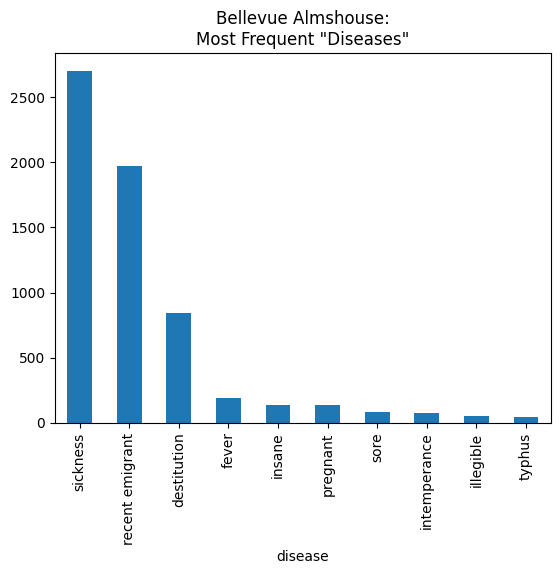

In [25]:
bellevue_df['disease'].value_counts()[:10].plot(kind='bar', title='Bellevue Almshouse:\nMost Frequent "Diseases"')

 We specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter:
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots
 
For example, to make a horizontal bar chart, we can set `kind='barh'`

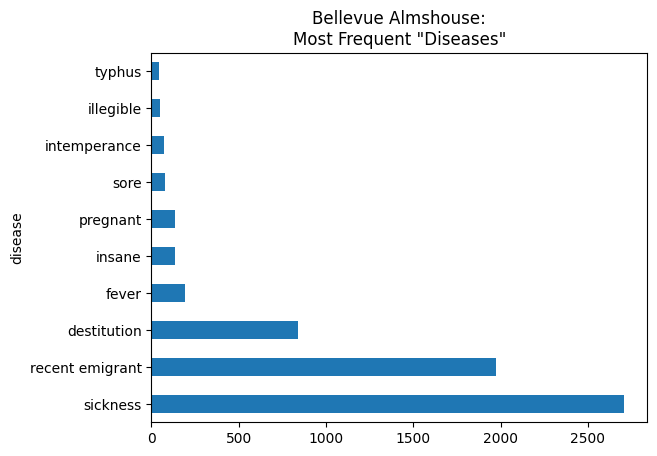

In [26]:
bellevue_df['disease'].value_counts()[:10].plot(kind='barh',title='Bellevue Almshouse:\nMost Frequent "Diseases"').get_figure().savefig('Bellevue')

To make a pie chart, we can set `kind='pie'`

<Axes: title={'center': 'Bellevue Almshouse:\nMost Frequent "Professions"'}, ylabel='count'>

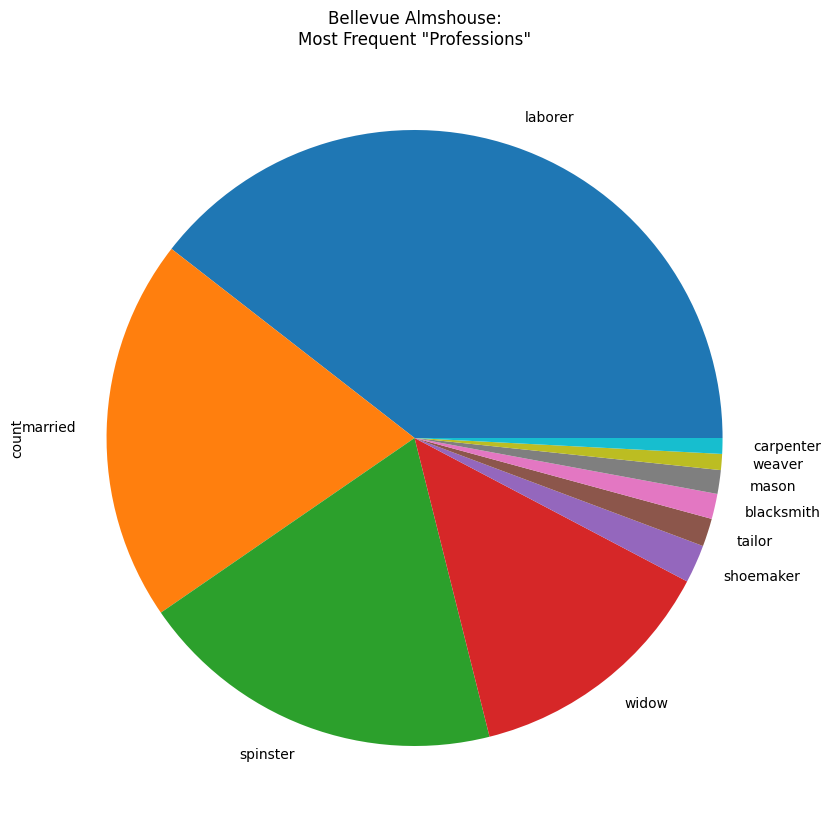

In [28]:
bellevue_df['profession'].value_counts()[:10].plot(kind='pie', figsize=(10, 10), title='Bellevue Almshouse:\nMost Frequent "Professions"')

To save a plot as an image file or PDF file, we can assign the plot to a variable called `ax`, short for axes.

Then we can use `ax.figure.savefig('FILE-NAME.png')` or `ax.figure.savefig('FILE-NAME.pdf')`.

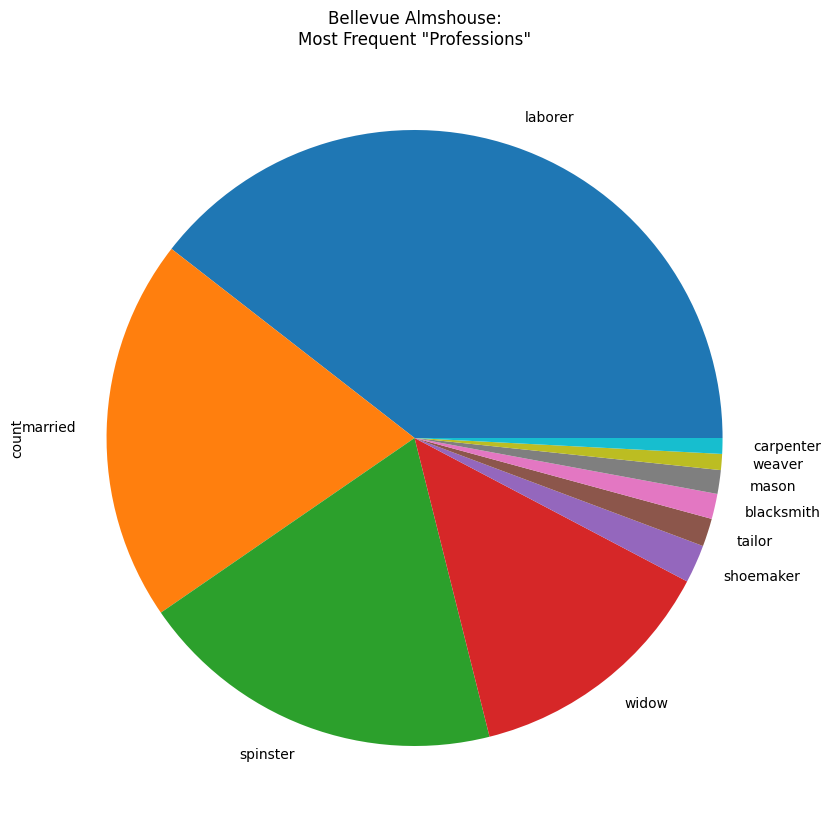

In [29]:
ax = bellevue_df['profession'].value_counts()[:10].plot(kind='pie', figsize=(10, 10), title='Bellevue Almshouse:\nMost Frequent "Professions"')
ax.figure.savefig('./figures/Bellevue-professions_pie-chart.png')

Now go and check the figures folder under this chapter 3. 

If your plot is being cut off in the image, see Pandas Basics Part 2 ("Prevent Labels From Getting Cut Off").

## 10. Filter/Subset Data

We can filter a Pandas DataFrame to select only certain values. Filtering data by certain values is similar to selecting columns.

We type the name of the DataFrame followed by square brackets and then, instead of inserting a column name, we insert a True/False condition. For example, to select only rows that contain the value "teacher," we insert the condition `bellevue_df['profession'] == 'teacher'`

In [30]:
bellevue_df[bellevue_df['profession'] == 'teacher']

,date_in,first_name,last_name,age,disease,profession,gender,children
2195,1847-03-12,Michael,Rush,40.0,recent emigrant,teacher,m,NaN
2692,1846-03-11,Thomas,Brady,45.0,NaN,teacher,m,NaN
3773,1846-07-06,Henry,Dunlap,66.0,NaN,teacher,m,NaN
4283,1846-09-03,John B.,Murray,45.0,NaN,teacher,m,NaN
4286,1846-09-03,Alexander,Alcock,46.0,NaN,teacher,m,NaN
4611,1846-10-15,John,Dillon,32.0,NaN,teacher,m,NaN
5224,1847-03-01,George F.,Robins,57.0,destitution,teacher,m,NaN
6251,1847-08-05,Patrick,McGowen,24.0,sickness,teacher,m,NaN
8293,1847-05-27,William,Smith,29.0,destitution,teacher,m,NaN
8641,1847-06-23,Thomas,Gleason,50.0,sickness,teacher,m,NaN


It can be helpful to isolate this condition and see that it produces a long list of True/False pairs for every row.

In [31]:
bellevue_df['profession'] == 'teacher'

0       False
1       False
2       False
3       False
4       False
        ...  
9579    False
9580    False
9581    False
9582    False
9583    False
Name: profession, Length: 9584, dtype: bool

Filtering DataFrames can sometimes get confusing and unwieldy (as conditions within conditions pile up like Russian dolls). It can be helpful to make a separate variable for a filter, as below.

In [32]:
teacher_filter = bellevue_df['profession'] == 'teacher'

In [33]:
bellevue_df[teacher_filter]

,date_in,first_name,last_name,age,disease,profession,gender,children
2195,1847-03-12,Michael,Rush,40.0,recent emigrant,teacher,m,NaN
2692,1846-03-11,Thomas,Brady,45.0,NaN,teacher,m,NaN
3773,1846-07-06,Henry,Dunlap,66.0,NaN,teacher,m,NaN
4283,1846-09-03,John B.,Murray,45.0,NaN,teacher,m,NaN
4286,1846-09-03,Alexander,Alcock,46.0,NaN,teacher,m,NaN
4611,1846-10-15,John,Dillon,32.0,NaN,teacher,m,NaN
5224,1847-03-01,George F.,Robins,57.0,destitution,teacher,m,NaN
6251,1847-08-05,Patrick,McGowen,24.0,sickness,teacher,m,NaN
8293,1847-05-27,William,Smith,29.0,destitution,teacher,m,NaN
8641,1847-06-23,Thomas,Gleason,50.0,sickness,teacher,m,NaN


In a similar vein, it's often useful to make a new variable for a filtered DataFrame. For example, let's say we wanted to look at only the women in the dataset and see the most commons professions.

In [34]:
women_filter = bellevue_df['gender'] == 'w'

In [35]:
bellevue_women = bellevue_df[women_filter]

In [36]:
bellevue_women['profession'].value_counts()

profession
married        1564
spinster       1507
widow          1043
laborer          27
seamstress        3
baker             2
single            2
waiter            2
cook              1
tailor            1
sham              1
carpenter         1
weaver            1
peddler           1
gardener          1
(illegible)       1
servant           1
Name: count, dtype: int64

<Axes: title={'center': 'Bellevue Almshouse:\nMost Frequent "Professions" Among Women'}, ylabel='count'>

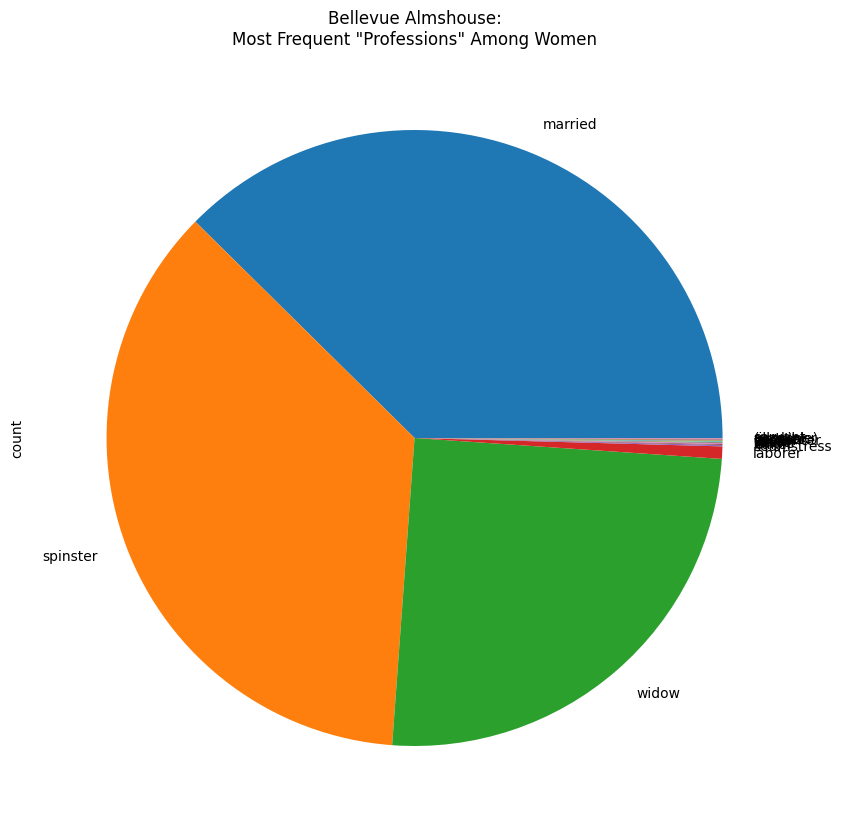

In [37]:
bellevue_women['profession'].value_counts().plot(kind='pie', figsize=(10,10), title='Bellevue Almshouse:\nMost Frequent "Professions" Among Women')

There's a lot we can do with filters beyond exact value matches with an equals operator `==`.

We can also incorporate `>`, `<`, `>=`, `<=` with integers, floats, and even dates. For example, we can filter the DataFrame for only people who arrived to the Bellevue Almshouse on or after '1847-04-17'

In [38]:
date_filter = bellevue_df['date_in'] >= '1847-04-17'

In [39]:
bellevue_df[date_filter]

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
2,1847-04-17,Anthony,Clark,60.0,recent emigrant,laborer,m,Charles Riley afed 10 days
7,1847-04-19,Daniel,Loftus,27.0,destitution,laborer,m,NaN
15,1847-04-17,Dan,Delany,10.0,typhus,NaN,m,NaN
22,1847-04-17,Catharine,Lyon,20.0,recent emigrant,spinster,w,NaN
...,...,...,...,...,...,...,...,...
9579,1847-06-17,Mary,Smith,47.0,NaN,NaN,w,NaN
9580,1847-06-22,Francis,Riley,29.0,lame,superintendent,m,NaN
9581,1847-07-02,Martin,Dunn,4.0,NaN,NaN,m,NaN
9582,1847-07-08,Elizabeth,Post,32.0,NaN,NaN,w,NaN


## 11. Write to CSV

To output a new CSV file, we can use the `.to_csv` method with a name for the file in quotation marks. 

Here's how we might output a new CSV file that only includes rows with women.

In [40]:
bellevue_women.to_csv("./data/Bellevue_women.csv", encoding='utf-8', index=False)

In addition to a filename, we're also specifying that the encoding is utf-8 and that the Index (the bolded left-most column) is not included in the CSV file.

## 12. Further Resources

- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), Pandas Official Documentation
- ["Data Manipulation with Pandas"](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html), *Python Data Science*, Jake VanderPlas

## 13. Exercises!

Respond to the following questions by using what you've learned so far.

Here are some pandas methods to consider using:

| Pandas method | Explanation                         |
|----------|-------------------------------------|
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |
| `.count()`    | Total number of non-blank values    |
| `.value_counts()` | Frequency of unique values |

### ❓  How old (on average) were the people admitted to the Bellevue Almshouse?

In [41]:
bellevue_df['age'].mean()

30.33260436333124

### ❓  How old was the oldest person admitted to Bellevue?

In [42]:
bellevue_df['age'].max()

97.0

### ❓  How young was the youngest person?

In [43]:
bellevue_df['age'].min()

0.08

### ❓ What were the most common professions among these Irish immigrants?

To count the values in a column (Series), we can use the `.value_counts()` method.

What patterns do you notice in this list? What seems strange to you? What can we learn about the people in the dataset *and* the people who created the dataset?

In [76]:
immigrant_filter = bellevue_df['disease'] == 'recent emigrant'
bellevue_emigrant = bellevue_df[immigrant_filter]
bellevue_emigrant['profession'].value_counts()[:5]

profession
laborer      724
spinster     373
married      255
widow         47
shoemaker     18
Name: count, dtype: int64

I notice that the "professions" that are among the most common among the Irish immigrants are 'laborer', 'spinster', 'married', and 'widow'. What seems strange to me are four of the 5 most common "profession" which are not "profession" but a marital status. We can learn that most Irish immigrants were laborer, married, and spinsters. Also, the people who created the dataset made a mistake by labeling Irish immigrants' professions as marital status. 

### ❓ What are the most common diseases?

In [72]:
bellevue_df['disease'].value_counts()[:5]

disease
sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
Name: count, dtype: int64

### ❓  Where were most people sent?

In [75]:
bellevue_df['sent_to']
# I dont know how to do this since there is no 'sent to' key.


KeyError: 'sent_to'

### Examine Subsets

#### ❓  What profession of people were most impacted by [X disease]?

To explore this question, choose what disease you would like to explore. You can do this via the `value_counts()` method on the `disease` Series column of the `bellevue_df` DataFrame.

In [80]:
# This reports the top 10, but you can change this value if you want to see more
bellevue_df['disease'].value_counts()[:10]


disease
sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
Name: count, dtype: int64

Now, you will need to filter the DataFrame's (`bellevue_df`) rows with 2 conditions.

1. By 'disease' with the value of X disease
2. By 'profession'

Let's break that up.

In [81]:
# Note a couple things when slicing a subset of the entire column:
# 1. First reference the entire DF: bellevue_df
# 2. Then inside the scope of the square brackets [], write your condition
# 3. The condition includes a reference to the Series of interest: bellevue_df['sent_to']
# 4. The == means 'equals'
# 5. The disease value, which is a String '', needs to be the exact value that we are interested in slicing. 
# NOTE: If we were even slightly off with the value, we'd return nothing or unwanted values.
df_subset = bellevue_df[bellevue_df['disease'] == 'fever']
df_subset.head()

,date_in,first_name,last_name,age,disease,profession,gender,children
147,1847-04-28,Julia,Bergen,19.0,fever,spinster,w,NaN
151,1847-04-23,Hanten,Fitzpatrick,10.0,fever,NaN,m,NaN
152,1847-04-20,Esther,McGaughan,23.0,fever,spinster,w,NaN
323,1847-04-22,Cathe.,Jianey?,25.0,fever,spinster,w,NaN
369,1847-05-05,Mary,Gahagam,22.0,fever,spinster,w,NaN


Now, how would you use `.value_counts()` to see the top 5 professions with your chosen diseases?

In [82]:
df_subset['profession'].value_counts()[:5]

profession
laborer      69
spinster     44
married      26
widow        12
shoemaker     6
Name: count, dtype: int64